# Ground plane detection (single image)

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from depth_map import createMap

## Make disparity map

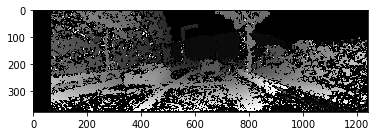

In [23]:
path_to_kitti = "KITTI/data_scene_flow/testing/"
disparity = createMap(path_to_kitti,'000183_11.png')
plt.imshow(disparity, 'gray');

In [20]:
# disparity of point on a car
disparity[250,475]

523

## Flatten disparity map, add u & v info
Need to revisit

array([   0,    1,    2, ..., 1238, 1239, 1240])

In [133]:
u = np.tile(range(disparity.shape[1]), disparity.shape[0])
v = np.repeat(range(disparity.shape[0]), disparity.shape[1])
uv_disp = np.array([u,v,disparity.flatten()]).T

In [134]:
#u,v,disp
uv_disp

array([[   0,    0,  -16],
       [   1,    0,  -16],
       [   2,    0,  -16],
       ...,
       [1238,  375,  -16],
       [1239,  375,  -16],
       [1240,  375,  -16]])

## Remove -16 (no data) pixels

In [135]:
uv_disp_noblanks = uv_disp[uv_disp[:,2]!=-16]
uv_disp_noblanks

array([[  69,    4,  422],
       [  70,    4,  422],
       [  73,    4,  419],
       ...,
       [1233,  371,  217],
       [1234,  371,  219],
       [1235,  371,  219]])

In [136]:
from sklearn.linear_model import RANSACRegressor

In [137]:
u = uv_disp_noblanks[:,0].reshape(-1, 1)
v = uv_disp_noblanks[:,1].reshape(-1, 1)
d = uv_disp_noblanks[:,2]

## Plot

### U (horizontal scan)

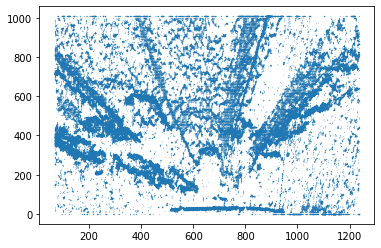

In [138]:
plt.scatter(x=u,y=d, s=0.01);

### V (vertical scan)

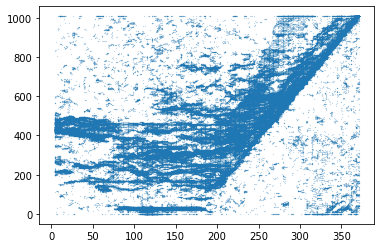

In [139]:
plt.scatter(x=v,y=d, s=0.01);

## Fit line to u, disp and v, disp

In [97]:
ransac_u = RANSACRegressor()
ransac_u.fit(u,d)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [111]:
np.array([range(disparity.shape[1])])

array([[   0,    1,    2, ..., 1238, 1239, 1240]])